In [ ]:
!pip install faker

In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
import string

# Initialize Faker for generating names and locations
fake = Faker()

# Dataset parameters
num_users = 100
num_songs = 50
num_days = 30
num_genres = 5
num_countries = 10

# Generate random user names and song titles
user_names = [fake.name() for _ in range(num_users)]

# Generate random track IDs (e.g., "TRK-X8A7B2Z3")
track_ids = ["TRK-" + ''.join(random.choices(string.ascii_uppercase + string.digits, k=8)) for _ in range(num_songs)]

# Generate user device types
device_types = ["Mobile", "Desktop", "Smart Speaker", "Tablet", "TV", "Car Audio"]

# Generate subscription types
subscription_types = ["Free", "Premium", "Family"]

# Generate geolocation data (country, city)
countries = [fake.country() for _ in range(num_countries)]
cities = [fake.city() for _ in range(num_countries)]

# Generate timestamps
timestamps = np.random.randint(1, num_days + 1, size=(num_users * num_songs * num_days))

# Generate listening hours (morning, afternoon, night)
listening_hours = np.random.randint(0, 24, size=(num_users * num_songs * num_days))

# Generate song durations (between 2 to 6 minutes, converted to seconds)
song_durations = np.random.randint(120, 360, size=(num_songs))

# Assign genres
song_genres = np.random.randint(1, num_genres + 1, size=(num_songs))

# Assign random play counts
play_counts = np.random.randint(1, 11, size=(num_users * num_songs * num_days))

# Assign replay counts (songs that were played more than twice)
replay_counts = np.random.randint(0, 5, size=(num_users * num_songs * num_days))

# Assign total play time (play count * song duration in seconds)
total_play_time_sec = play_counts * np.random.choice(song_durations, size=(num_users * num_songs * num_days))
total_play_time_min = total_play_time_sec / 60  # Convert to minutes

# Assign probability-based replay status
repeated_play = ((np.random.rand(num_users * num_songs * num_days) < 0.3) & (play_counts > 2)).astype(int)

# Assign song popularity (between 1-100)
song_popularity = np.random.randint(1, 101, size=(num_songs))

# Assign user behavior (skipped song or not)
skip_behavior = np.random.choice([0, 1], size=(num_users * num_songs * num_days), p=[0.8, 0.2])

# Assign mood category based on genre (1-5 represents different moods)
mood_category = np.random.randint(1, 6, size=(num_users * num_songs * num_days))

# Assign song release years (randomized between 2000-2024)
song_release_years = np.random.randint(2000, 2025, size=(num_songs))


# Generate DataFrame
data = pd.DataFrame({
    "user_name": np.random.choice(user_names, size=(num_users * num_songs * num_days)),
    "track_id": np.random.choice(track_ids, size=(num_users * num_songs * num_days)),
    "timestamp": timestamps,
    "listening_hour": listening_hours,
    "play_count": play_counts,
    "replay_count": replay_counts,
    "total_play_time_sec": total_play_time_sec,
    "total_play_time_min": total_play_time_min.round(2),
    "repeated_play": repeated_play,
    "song_genre": np.random.choice(song_genres, size=(num_users * num_songs * num_days)),
    "device_type": np.random.choice(device_types, size=(num_users * num_songs * num_days)),
    "skip_behavior": skip_behavior,
    "mood_category": mood_category,
    "song_popularity": np.random.choice(song_popularity, size=(num_users * num_songs * num_days)),
    "song_release_year": np.random.choice(song_release_years, size=(num_users * num_songs * num_days)),
})

# Sort data for better readability
data = data.sort_values(by=["user_name", "timestamp"])

# Show a sample
data.head()


,user_name,track_id,timestamp,listening_hour,play_count,replay_count,total_play_time_sec,total_play_time_min,repeated_play,song_genre,device_type,skip_behavior,mood_category,song_popularity,song_release_year
6590,Alicia Taylor,TRK-D8XP7VZ2,1,6,1,0,309,5.15,0,3,TV,0,5,91,2010
7309,Alicia Taylor,TRK-UIVDR315,1,0,3,4,966,16.10,0,4,Smart Speaker,0,3,77,2020
7809,Alicia Taylor,TRK-V8M4VE8K,1,2,7,4,1638,27.30,0,2,Car Audio,0,1,38,2010
10701,Alicia Taylor,TRK-D4OI60D1,1,10,8,3,2136,35.60,1,3,Tablet,0,3,82,2008
13762,Alicia Taylor,TRK-AFBPG82Y,1,11,8,3,1728,28.80,0,5,Mobile,0,4,29,2020


In [ ]:
data

,user_name,track_id,timestamp,listening_hour,play_count,replay_count,total_play_time_sec,total_play_time_min,repeated_play,song_genre,device_type,skip_behavior,mood_category,song_popularity,song_release_year
6590,Alicia Taylor,TRK-D8XP7VZ2,1,6,1,0,309,5.15,0,3,TV,0,5,91,2010
7309,Alicia Taylor,TRK-UIVDR315,1,0,3,4,966,16.10,0,4,Smart Speaker,0,3,77,2020
7809,Alicia Taylor,TRK-V8M4VE8K,1,2,7,4,1638,27.30,0,2,Car Audio,0,1,38,2010
10701,Alicia Taylor,TRK-D4OI60D1,1,10,8,3,2136,35.60,1,3,Tablet,0,3,82,2008
13762,Alicia Taylor,TRK-AFBPG82Y,1,11,8,3,1728,28.80,0,5,Mobile,0,4,29,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137020,Yesenia Strickland,TRK-XKPNT7BI,30,0,8,4,1392,23.20,0,3,Tablet,0,5,12,2003
138379,Yesenia Strickland,TRK-91QG0FVS,30,18,3,0,882,14.70,0,4,TV,0,5,14,2023
145930,Yesenia Strickland,TRK-XKPNT7BI,30,14,7,2,1512,25.20,0,2,Tablet,0,4,14,2000
146191,Yesenia Strickland,TRK-JL976XNT,30,9,3,1,381,6.35,0,3,Smart Speaker,0,4,73,2019


In [ ]:
data_user = data[data['user_name'] == data['user_name'][0]]

In [ ]:
data_user

,user_name,track_id,timestamp,listening_hour,play_count,replay_count,total_play_time_sec,total_play_time_min,repeated_play,song_genre,device_type,skip_behavior,mood_category,song_popularity,song_release_year
0,Lauren Peterson,TRK-OP9DG2OZ,1,18,5,3,1755,29.25,0,1,Smart Speaker,0,3,14,2020
1043,Lauren Peterson,TRK-P3CPYIF1,1,3,9,4,2223,37.05,0,1,Smart Speaker,0,1,96,2010
3777,Lauren Peterson,TRK-LMQBNCV0,1,13,5,0,750,12.50,0,3,Car Audio,0,1,14,2017
4970,Lauren Peterson,TRK-XXEE6NAJ,1,21,4,4,1032,17.20,0,2,Car Audio,0,4,80,2014
6331,Lauren Peterson,TRK-AFBPG82Y,1,11,7,3,1106,18.43,0,5,Car Audio,0,4,84,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135382,Lauren Peterson,TRK-V8M4VE8K,30,2,8,4,1168,19.47,1,2,Mobile,0,3,53,2009
138910,Lauren Peterson,TRK-XXEE6NAJ,30,19,5,1,1420,23.67,0,5,Car Audio,0,3,70,2017
141132,Lauren Peterson,TRK-FWCS395H,30,14,7,0,1638,27.30,0,3,Desktop,1,1,14,2012
146333,Lauren Peterson,TRK-UIVDR315,30,18,9,0,2781,46.35,0,2,Desktop,0,1,52,2008


In [ ]:
data_user.drop(columns=['user_name','device_type'],axis = 1, inplace = True)

<ipython-input-27-1db58022559d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_user.drop(columns=['user_name','device_type'],axis = 1, inplace = True)


In [ ]:
data_user

,track_id,timestamp,listening_hour,play_count,replay_count,total_play_time_sec,total_play_time_min,repeated_play,song_genre,skip_behavior,mood_category,song_popularity,song_release_year
0,TRK-OP9DG2OZ,1,18,5,3,1755,29.25,0,1,0,3,14,2020
1043,TRK-P3CPYIF1,1,3,9,4,2223,37.05,0,1,0,1,96,2010
3777,TRK-LMQBNCV0,1,13,5,0,750,12.50,0,3,0,1,14,2017
4970,TRK-XXEE6NAJ,1,21,4,4,1032,17.20,0,2,0,4,80,2014
6331,TRK-AFBPG82Y,1,11,7,3,1106,18.43,0,5,0,4,84,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135382,TRK-V8M4VE8K,30,2,8,4,1168,19.47,1,2,0,3,53,2009
138910,TRK-XXEE6NAJ,30,19,5,1,1420,23.67,0,5,0,3,70,2017
141132,TRK-FWCS395H,30,14,7,0,1638,27.30,0,3,1,1,14,2012
146333,TRK-UIVDR315,30,18,9,0,2781,46.35,0,2,0,1,52,2008


In [ ]:
data_user.isna().sum()

,0
track_id,0
timestamp,0
listening_hour,0
play_count,0
replay_count,0
total_play_time_sec,0
total_play_time_min,0
repeated_play,0
song_genre,0
skip_behavior,0


KMeans Inertia: 2826.7107855578633
Silhouette Score: 0.4281218629077801


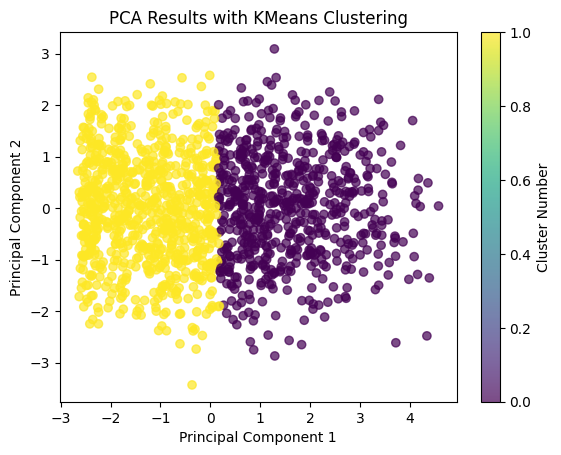

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Copy the dataset
X = data_user.copy()  # Replace 'data_user' with your actual dataset

# Identify numerical and categorical features
num_features = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(exclude=[np.number]).columns

# Define pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Scale numerical features
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# Apply transformations
X_transformed = preprocessor.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Assign cluster labels to the dataset
X['Cluster'] = labels

# Evaluate clustering using inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(X_pca, labels)

print(f"KMeans Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

# Scatter plot for visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Cluster'], cmap='viridis', alpha=0.7)
plt.title("PCA Results with KMeans Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Number")
plt.show()


KMeans Inertia: 1659.201193141252
Silhouette Score: 0.44375255344734765


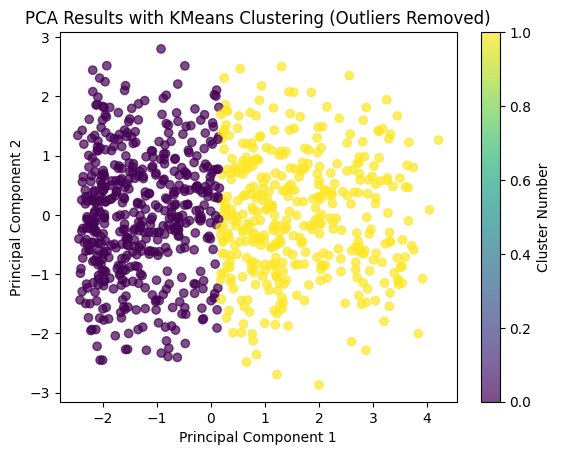

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Copy the dataset
X = data_user.copy()  # Replace 'data_user' with your actual dataset

# Identify numerical and categorical features
num_features = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(exclude=[np.number]).columns

# Outlier Removal using IQR
def remove_outliers(df, features, threshold=1.5):
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

X = remove_outliers(X, num_features)

# Define pipelines
num_pipeline = Pipeline([
    ('scaler', StandardScaler())  # Scale numerical features
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encode categorical features
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ])

# Apply transformations
X_transformed = preprocessor.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_transformed)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)

# Assign cluster labels to the dataset
X['Cluster'] = labels

# Evaluate clustering using inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(X_pca, labels)

print(f"KMeans Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")

# Scatter plot for visualization
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Cluster'], cmap='viridis', alpha=0.7)
plt.title("PCA Results with KMeans Clustering (Outliers Removed)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Number")
plt.show()
